In [1]:
def calcular_costo_total(costo_mercancia, costo_envio, costo_seguro, arancel_porcentaje, iva_porcentaje):
    """
    Calcula el costo total de una importación.

    Args:
        costo_mercancia (float): Costo de la mercancía.
        costo_envio (float): Costo del envío (flete).
        costo_seguro (float): Costo del seguro.
        arancel_porcentaje (float): Porcentaje del arancel (ej. 0.05 para 5%).
        iva_porcentaje (float): Porcentaje del IVA (ej. 0.19 para 19%).

    Returns:
        float: El costo total de la importación.
    """
    valor_cif = costo_mercancia + costo_envio + costo_seguro
    arancel = valor_cif * arancel_porcentaje
    iva_base = valor_cif + arancel # El IVA se calcula sobre el valor CIF + arancel
    iva = iva_base * iva_porcentaje
    costo_total = valor_cif + arancel + iva
    return costo_total, valor_cif, arancel, iva

def obtener_valor(mensaje, tipo=float):
    """
    Función auxiliar para obtener una entrada numérica del usuario.
    """
    while True:
        try:
            valor = tipo(input(mensaje))
            if valor < 0:
                print("Por favor, ingresa un valor positivo.")
            else:
                return valor
        except ValueError:
            print("Entrada inválida. Por favor, ingresa un número.")

print("--- Calculadora de Costos de Importación por Incoterm ---")

# Datos generales del producto
nombre_producto = input("Ingresa el nombre del producto: ")
costo_mercancia_base = obtener_valor(f"Ingresa el costo base de la mercancía ({nombre_producto}): $")
arancel_porcentaje = obtener_valor("Ingresa el porcentaje del arancel (ej. 0.05 para 5%): ")
iva_porcentaje = 0.19 # El IVA en Colombia es del 19%

# --- Calculando para EX WORKS (EXW) ---
print("\n--- Cálculos para EX WORKS (EXW) ---")
print("En EXW, tú como importador cubres todos los costos desde el origen.")
costo_envio_exw = obtener_valor("Costo de flete desde origen hasta tu almacén (EXW): $")
costo_seguro_exw = obtener_valor("Costo de seguro (EXW): $")
costo_total_exw, valor_cif_exw, arancel_exw, iva_exw = calcular_costo_total(
    costo_mercancia_base, costo_envio_exw, costo_seguro_exw, arancel_porcentaje, iva_porcentaje
)

# --- Calculando para FOB (Free On Board) ---
print("\n--- Cálculos para FOB (FOB) ---")
print("En FOB, el vendedor cubre los costos hasta que la mercancía está a bordo del buque/avión.")
costo_envio_fob = obtener_valor("Costo de flete desde puerto de carga hasta tu almacén (FOB): $")
costo_seguro_fob = obtener_valor("Costo de seguro (FOB): $")
costo_total_fob, valor_cif_fob, arancel_fob, iva_fob = calcular_costo_total(
    costo_mercancia_base, costo_envio_fob, costo_seguro_fob, arancel_porcentaje, iva_porcentaje
)

# --- Calculando para CIF (Cost, Insurance and Freight) ---
print("\n--- Cálculos para CIF (CIF) ---")
print("En CIF, el vendedor cubre costos y seguro hasta el puerto de destino.")
# Aquí asumimos que el costo_envio_cif y costo_seguro_cif ya están incluidos en el precio que te da el vendedor para CIF
# Por simplicidad en este ejemplo, si tuvieras que agregar algún costo adicional, lo harías aquí.
# Para este ejercicio, vamos a usar un costo de envío y seguro que el vendedor ya te cotizó en el precio CIF.
costo_cif_cotizado = obtener_valor("Costo CIF cotizado por el vendedor (incluye mercancía, flete y seguro hasta puerto de destino): $")
# Para el cálculo del arancel y el IVA, necesitamos separar los componentes o al menos el valor CIF implícito.
# Si el costo_cif_cotizado ya es el valor CIF completo, lo usamos directamente.
# En un escenario real, si te dan un precio CIF que ya incluye todo, el desglose para arancel/IVA se basa en ese valor.
# Aquí, para que sea comparable, vamos a re-calcular como si el costo_cif_cotizado fuera el "valor_cif"
# y el resto de los componentes se "inferirían" o se asumirían en ese valor.
# Para mantener la simplicidad, si el usuario ingresa un 'costo_cif_cotizado', asumimos que ese es el valor CIF
# sobre el cual se calcularán aranceles e IVA.
valor_cif_cif = costo_cif_cotizado
arancel_cif = valor_cif_cif * arancel_porcentaje
iva_base_cif = valor_cif_cif + arancel_cif
iva_cif = iva_base_cif * iva_porcentaje
costo_total_cif = valor_cif_cif + arancel_cif + iva_cif


# --- Resumen Comparativo ---
print("\n--- Resumen Comparativo de Incoterms ---")
print(f"Producto: {nombre_producto}")
print(f"Costo Base de la Mercancía: ${costo_mercancia_base:,.2f}")
print(f"Porcentaje de Arancel: {arancel_porcentaje*100:.2f}%")
print(f"Porcentaje de IVA: {iva_porcentaje*100:.2f}% (Fijo para Colombia)\n")

print("-" * 50)
print(f"{'Incoterm':<10} | {'Valor CIF':<12} | {'Arancel':<10} | {'IVA':<10} | {'Costo Total':<15}")
print("-" * 50)
print(f"{'EXW':<10} | ${valor_cif_exw:<11.2f} | ${arancel_exw:<9.2f} | ${iva_exw:<9.2f} | ${costo_total_exw:<14.2f}")
print(f"{'FOB':<10} | ${valor_cif_fob:<11.2f} | ${arancel_fob:<9.2f} | ${iva_fob:<9.2f} | ${costo_total_fob:<14.2f}")
print(f"{'CIF':<10} | ${valor_cif_cif:<11.2f} | ${arancel_cif:<9.2f} | ${iva_cif:<9.2f} | ${costo_total_cif:<14.2f}")
print("-" * 50)

# Determinando el mejor Incoterm
costos = {
    "EXW": costo_total_exw,
    "FOB": costo_total_fob,
    "CIF": costo_total_cif
}

mejor_incoterm = min(costos, key=costos.get)
print(f"\nEl Incoterm más conveniente para esta importación es: **{mejor_incoterm}** con un costo total de **${costos[mejor_incoterm]:,.2f}**.")
print("\nRecuerda poner valores más cercanos para tener un cálculo más exacto!.")

--- Calculadora de Costos de Importación por Incoterm ---
Ingresa el nombre del producto: flores
Ingresa el costo base de la mercancía (flores): $9000
Ingresa el porcentaje del arancel (ej. 0.05 para 5%): 0.09

--- Cálculos para EX WORKS (EXW) ---
En EXW, tú como importador cubres todos los costos desde el origen.
Costo de flete desde origen hasta tu almacén (EXW): $200
Costo de seguro (EXW): $50

--- Cálculos para FOB (FOB) ---
En FOB, el vendedor cubre los costos hasta que la mercancía está a bordo del buque/avión.
Costo de flete desde puerto de carga hasta tu almacén (FOB): $350
Costo de seguro (FOB): $30

--- Cálculos para CIF (CIF) ---
En CIF, el vendedor cubre costos y seguro hasta el puerto de destino.
Costo CIF cotizado por el vendedor (incluye mercancía, flete y seguro hasta puerto de destino): $9400

--- Resumen Comparativo de Incoterms ---
Producto: flores
Costo Base de la Mercancía: $9,000.00
Porcentaje de Arancel: 9.00%
Porcentaje de IVA: 19.00% (Fijo para Colombia)

-----

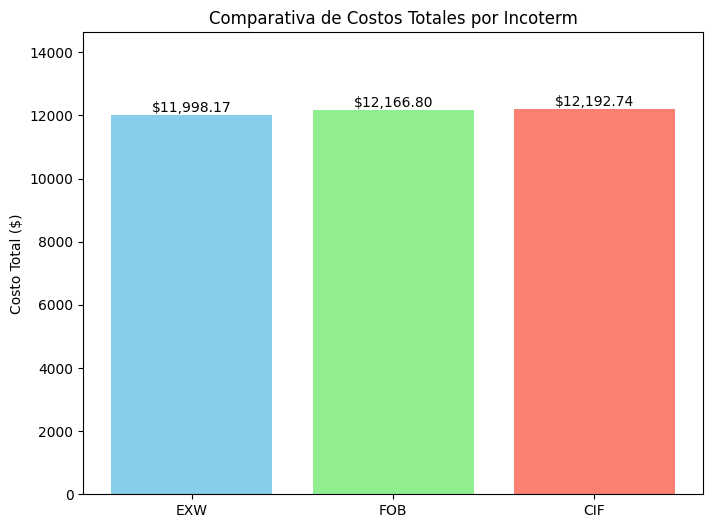

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Datos para la gráfica
incoterms = list(costos.keys())
costos_totales = list(costos.values())

# Crear la gráfica de barras
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(incoterms, costos_totales, color=['skyblue', 'lightgreen', 'salmon'])

# Añadir etiquetas de valor a las barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'${yval:,.2f}', va='bottom', ha='center') # va: vertical alignment, ha: horizontal alignment

# Personalizar la gráfica
ax.set_ylabel('Costo Total ($)')
ax.set_title('Comparativa de Costos Totales por Incoterm')
ax.set_ylim(0, max(costos_totales) * 1.2) # Ajustar límite superior del eje y para espacio de etiquetas

# Mostrar la gráfica
plt.show()
